# Importing Packages

In [1]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, logm
from scipy.special import comb
from itertools import combinations_with_replacement, product
from collections import Counter
import copy
from scipy.linalg import ishermitian
import time
from scipy.integrate import solve_ivp

# Definitions

In [23]:
J = 1.0  # Coupling constant
N, U = 2, 0.5
nu = N*U # Additional constant (nu)
hbar = 1.0  # Planck's constant (normalized)

def system(t, y, **kwargs):
    '''
    Definition of the ODEs.
    z-value is bound between -1 and 1 due to singularity in eqn-17.
    
    Args:
    y: list of initial conditions [phi, z]
    t: range of time list
    '''
    phi, z = y  # Unpack y into phi and z
    if np.abs(z) >= 1:
        z = np.sign(z) * 0.999
    phi_dot = (J * z * np.cos(phi)) / np.sqrt(1 - z**2) + (nu * z) / 4
    z_dot = -J * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]


# Initial Conditions and Time-range

In [24]:
# Time range for integration
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Initial conditions (phi(0), z(0))
initial_conditions = [
    # [0, 0],
    # [0, 0.1],
    # [0, 0.2],
    # [0, -0.9],

    [np.pi/4, 0],
    # [np.pi/4, 0.1],
    # [np.pi/4, 0.2],
    [np.pi/4, -0.5],

    [np.pi, 0],
    [np.pi, 0.5],
    # [np.pi, 0.2],
    # [np.pi, -0.9],
    
    # [0.1, 0.5],
    # [0.1, -0.5],
    # [np.pi/2, 0.3],
    # [np.pi/2, -0.3],
    # [np.pi, 0.1],
    # [np.pi, -0.1],
    # [np.pi/4, 0.8],
    # [np.pi/4, -0.8],
    # [3*np.pi/4, 0.8],
    # [3*np.pi/4, -0.8],
    # [np.pi, -0.3],
    # [np.pi, 0.8],
    # [5*np.pi/4, -0.3],
    # [2*np.pi, -0.3],
    # [3*np.pi, -0.3],
]

# Plotting Phase Portraits

(Phi, z)=(0.7853981633974483, 0):
 phi_vals=0.7852622585209338,
 z_vals=-0.014169360796678989
(Phi, z)=(0.7853981633974483, -0.5):
 phi_vals=0.7745020770133947,
 z_vals=-0.5121552663875851
(Phi, z)=(3.141592653589793, 0):
 phi_vals=3.141592653589793,
 z_vals=-2.4542020022993048e-18
(Phi, z)=(3.141592653589793, 0.5):
 phi_vals=3.1325283492383473,
 z_vals=0.499921338523049


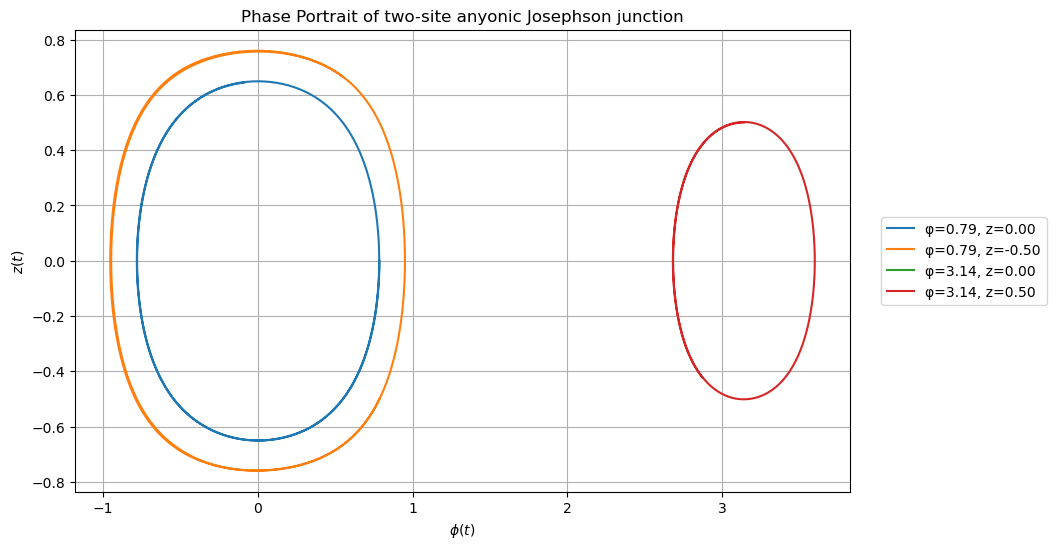

In [25]:
# Plot phase portraits
plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    # Solve the system of equations
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')

    # Extract solutions
    phi_vals = sol.y[0]
    z_vals = sol.y[1]

    print(f'(Phi, z)={phi0, z0}:\n phi_vals={phi_vals[1]},\n z_vals={z_vals[1]}')
    
    # Plot phase portrait
    plt.plot(phi_vals, z_vals, label=f'φ={phi0:.2f}, z={z0:.2f}')
    
plt.xlabel(r'$\phi(t)$') 
plt.ylabel(r'$z(t)$') 
plt.title('Phase Portrait of two-site anyonic Josephson junction')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

In [26]:
plt.savefig('ODEs-twosite_phaseportrait.png') 

<Figure size 640x480 with 0 Axes>

# Plotting $\phi$ \& $z$ as functions of time

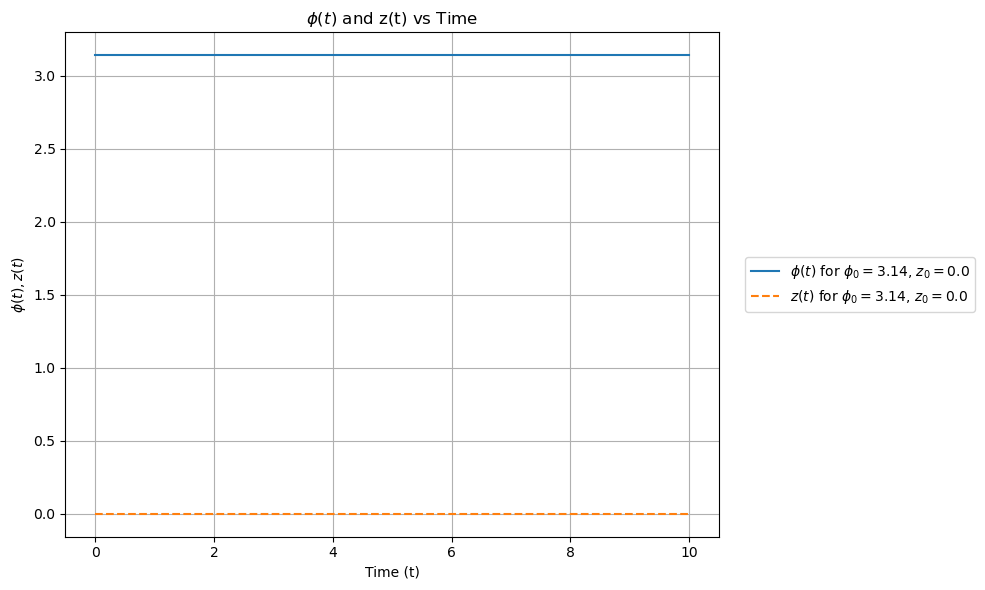

In [27]:
initial_conditions = [
   [np.pi, 0]
]

plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')

    phi_vals = sol.y[0]
    z_vals = sol.y[1]

    plt.plot(t_eval, phi_vals, label=rf'$\phi(t)$ for $\phi_{{0}}={phi0:.2f}$, $z_{{0}}={z0:.1f}$')
    plt.plot(t_eval, z_vals, label=rf'$z(t)$ for $\phi_{{0}}={phi0:.2f}$, $z_{{0}}={z0:.1f}$', linestyle='--')

plt.xlabel('Time (t)')
plt.ylabel(r'$\phi(t), z(t)$')
plt.title(r'$\phi(t)$ and z(t) vs Time')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
plt.savefig('ODEs-vs-time-twosite_phaseportrait.png') 

<Figure size 640x480 with 0 Axes>

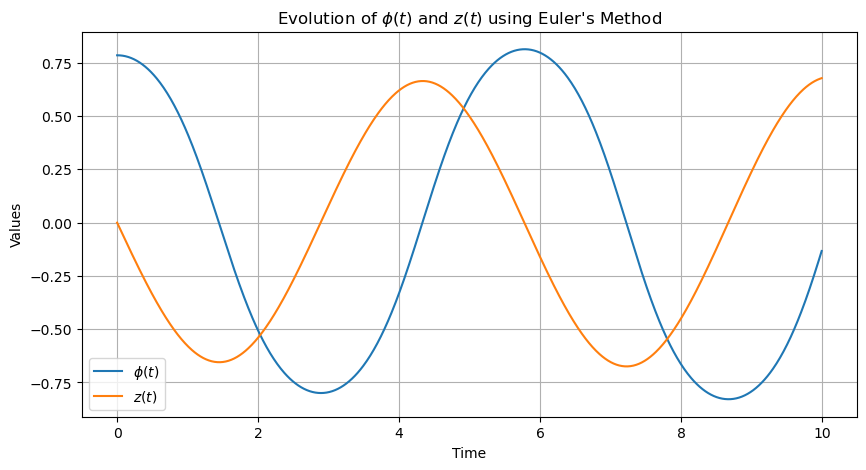

In [29]:
## Using Euler's method
import numpy as np
import matplotlib.pyplot as plt

def system(t, y, params):
    """
    Definition of the ODEs.
    Args:
    t: Current time (not used here but included for compatibility with general ODE solvers)
    y: List of state variables [phi, z]
    params: Dictionary of parameters {'t', 'k', 'U'}
    
    Returns:
    List [phi_dot, z_dot]
    """
    phi, z = y  # Unpack y into phi and z
    phi_dot = ((params['t'] * z * np.cos(phi)) / np.sqrt(1 - z**2)) + ((params['k'] * params['U'] * z) / 4)
    z_dot = -params['t'] * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]

def euler_method(system, y0, t_range, dt, params):
    """
    Solves a system of ODEs using Euler's method.
    Args:
    system: Function defining the system of ODEs
    y0: Initial conditions [phi_0, z_0]
    t_range: Time range as [t_start, t_end]
    dt: Time step size
    params: Dictionary of parameters
    
    Returns:
    time_points: Array of time points
    solution: Array of solutions [phi, z] at each time step
    """
    t_start, t_end = t_range
    time_points = np.arange(t_start, t_end, dt)
    solution = np.zeros((len(time_points), len(y0)))  # Preallocate solution array
    solution[0] = y0  # Set initial condition
    
    for i in range(1, len(time_points)):
        t = time_points[i - 1]
        y = solution[i - 1]
        dydt = system(t, y, params)
        solution[i] = y + dt * np.array(dydt)  # Euler step
    
    return time_points, solution

# Parameters
params = {'t': 1.0, 'k': 1.0, 'U': 1.0}  # Example parameter values
y0 = [np.pi/4, 0]  # Initial conditions [phi_0, z_0]
t_range = [0, 10]  # Time range [t_start, t_end]
dt = 0.01  # Time step

# Solve system
time_points, solution = euler_method(system, y0, t_range, dt, params)

# Plot results
phi, z = solution[:, 0], solution[:, 1]
plt.figure(figsize=(10, 5))
plt.plot(time_points, phi, label=r'$\phi(t)$')
plt.plot(time_points, z, label=r'$z(t)$')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Evolution of $\phi(t)$ and $z(t)$ using Euler\'s Method')
plt.grid()
plt.show()

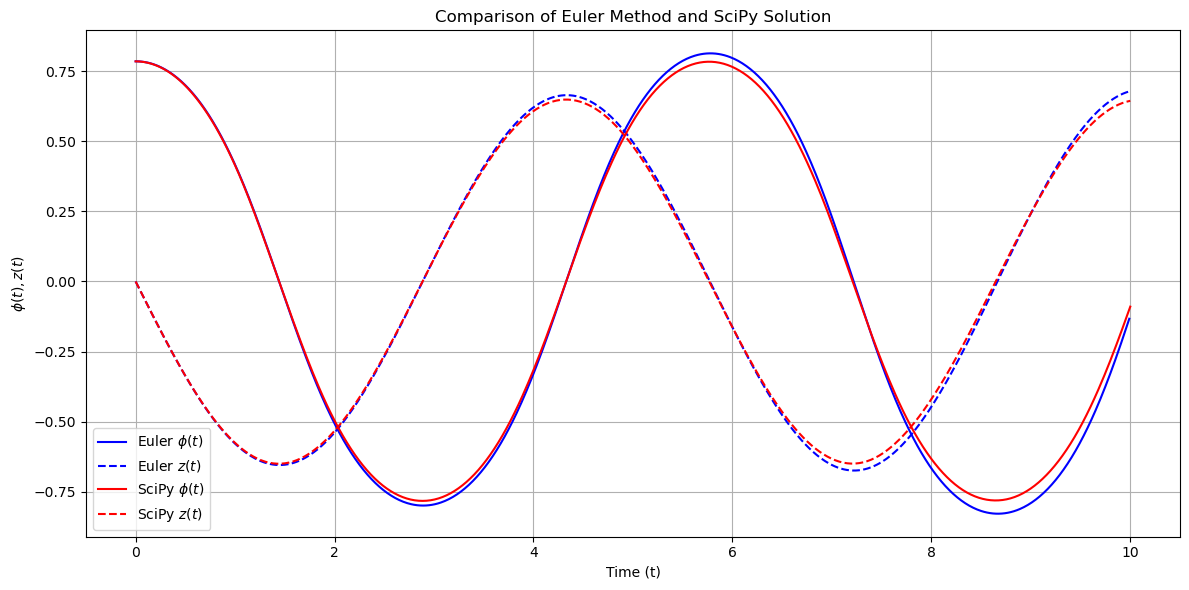

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System of ODEs
def system(t, y, params):
    phi, z = y  # Unpack y into phi and z
    phi_dot = ((params['t'] * z * np.cos(phi)) / np.sqrt(1 - z**2)) + ((params['k'] * params['U'] * z) / 4)
    z_dot = -params['t'] * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]

# Euler method function
def euler_method(system, y0, t_range, dt, params):
    t_start, t_end = t_range
    time_points = np.arange(t_start, t_end, dt)
    solution = np.zeros((len(time_points), len(y0)))
    solution[0] = y0
    
    for i in range(1, len(time_points)):
        t = time_points[i - 1]
        y = solution[i - 1]
        dydt = system(t, y, params)
        solution[i] = y + dt * np.array(dydt)
    
    return time_points, solution

# Parameters
params = {'t': 1.0, 'k': 1.0, 'U': 1.0}
y0 = [np.pi/4, 0]  # Initial conditions [phi_0, z_0]
t_range = (0, 10)
dt = 0.01

# Euler method solution
euler_time, euler_sol = euler_method(system, y0, t_range, dt, params)
phi_euler, z_euler = euler_sol[:, 0], euler_sol[:, 1]

# SciPy solve_ivp solution
t_eval = np.linspace(*t_range, 500)
sol = solve_ivp(system, t_range, y0, t_eval=t_eval, args=(params,), method='RK45')
phi_scipy, z_scipy = sol.y[0], sol.y[1]

# Plot results
plt.figure(figsize=(12, 6))

# Euler method
plt.plot(euler_time, phi_euler, label=r'Euler $\phi(t)$', linestyle='-', color='blue')
plt.plot(euler_time, z_euler, label=r'Euler $z(t)$', linestyle='--', color='blue')

# SciPy solve_ivp
plt.plot(t_eval, phi_scipy, label=r'SciPy $\phi(t)$', linestyle='-', color='red')
plt.plot(t_eval, z_scipy, label=r'SciPy $z(t)$', linestyle='--', color='red')

# Labels and legend
plt.xlabel('Time (t)')
plt.ylabel(r'$\phi(t), z(t)$')
plt.title('Comparison of Euler Method and SciPy Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

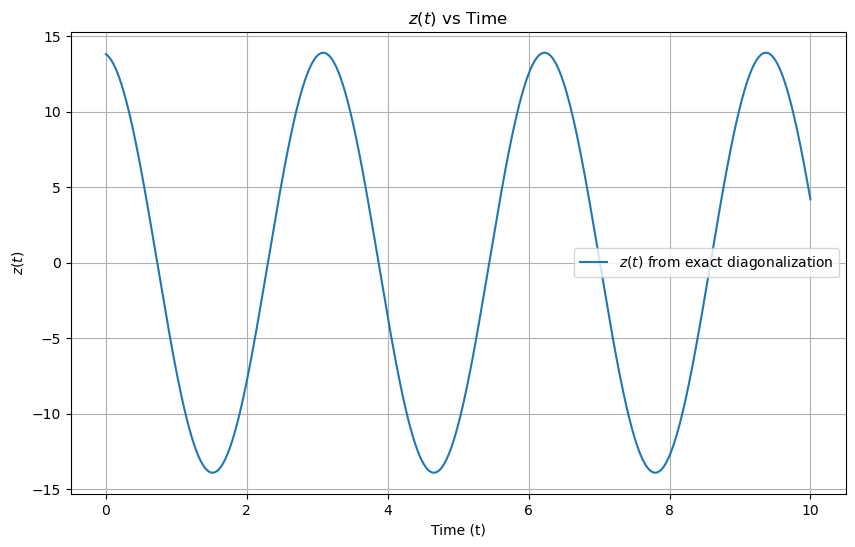

In [34]:
import numpy as np

# Factorial function for matrix exponential
def factorial(n):
    """Compute factorial of n."""
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

# Matrix exponential for exp(i * theta * n)
def matrix_exponential(theta, dim, terms=50):
    """
    Compute the matrix exponential exp(i * theta * n) for bosonic number operator.

    Args:
        theta (float): Phase angle.
        dim (int): Dimension of the bosonic Hilbert space.
        terms (int): Number of terms to include in the series expansion (default 50).

    Returns:
        list: A 2D list representing the exponential matrix.
    """
    # Construct the number operator n
    n_op = [[0 if i != j else i for i in range(dim)] for j in range(dim)]
    
    # Initialize identity matrix
    exp_matrix = [[1 if i == j else 0 for i in range(dim)] for j in range(dim)]
    
    # Compute the matrix exponential using the series
    current_term = [[1 if i == j else 0 for i in range(dim)] for j in range(dim)]  # Start with I
    for k in range(1, terms):
        # Compute i^k * theta^k / k!
        coeff = (1j * theta) ** k / factorial(k)
        
        # Compute the next term in the series: coeff * n_op^k
        next_term = [[0 for _ in range(dim)] for _ in range(dim)]
        for i in range(dim):
            for j in range(dim):
                for m in range(dim):  # Matrix multiplication
                    next_term[i][j] += current_term[i][m] * n_op[m][j]
                next_term[i][j] *= coeff
        
        # Add to the exponential matrix
        for i in range(dim):
            for j in range(dim):
                exp_matrix[i][j] += next_term[i][j]
        
        # Update current_term for the next iteration
        current_term = next_term

    return np.array(exp_matrix)

# Define the Hamiltonian for a two-site bosonic Josephson junction
def create_hamiltonian(N, J, U):
    """Create the Hamiltonian matrix for the bosonic Josephson junction."""
    H = np.zeros((N + 1, N + 1), dtype=complex)
    for n in range(N + 1):
        # Tunneling term
        if n > 0:
            H[n, n - 1] += -J * np.sqrt(n * (N - n + 1))
            H[n - 1, n] += -J * np.sqrt(n * (N - n + 1))
        # Interaction term
        H[n, n] += U * (n * (N - n))
    return H

# Initial parameters
N = 10  # Total number of particles
J = 1.0  # Tunneling amplitude
U = 0  # Interaction strength
theta = np.pi / 4  # Phase difference to apply
t_max = 10.0  # Total time
dt = 0.01  # Time step
time_steps = int(t_max / dt)

# Create the Hamiltonian and find eigenvalues and eigenvectors
H = create_hamiltonian(N, J, U)
eigvals, eigvecs = np.linalg.eigh(H)

# Initial state: ground state
psi_0 = eigvecs[:, 0]

# Phase operator exp(-i * theta * N1_op)
phase_op = matrix_exponential(theta, N + 1)

# Apply the phase difference to the initial state
psi_t = np.dot(phase_op, psi_0)

# Time evolution
z_t = []  # z(t) values
time = np.linspace(0, t_max, time_steps)
for t in time:
    # Time evolution operator exp(-i H t)
    time_evolution_op = np.diag(np.exp(-1j * eigvals * t))
    psi_t_evolved = np.dot(eigvecs, np.dot(time_evolution_op, np.dot(eigvecs.T.conj(), psi_t)))
    
    # Compute <psi| N1_op - N2_op |psi>
    z_value = sum((n * abs(psi_t_evolved[n])**2 - (N - n) * abs(psi_t_evolved[n])**2) for n in range(N + 1))
    z_t.append(z_value / N)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, z_t, label=r'$z(t)$ from exact diagonalization')
plt.xlabel('Time (t)')
plt.ylabel(r'$z(t)$')
plt.title(r'$z(t)$ vs Time')
plt.grid(True)
plt.legend()
plt.show()

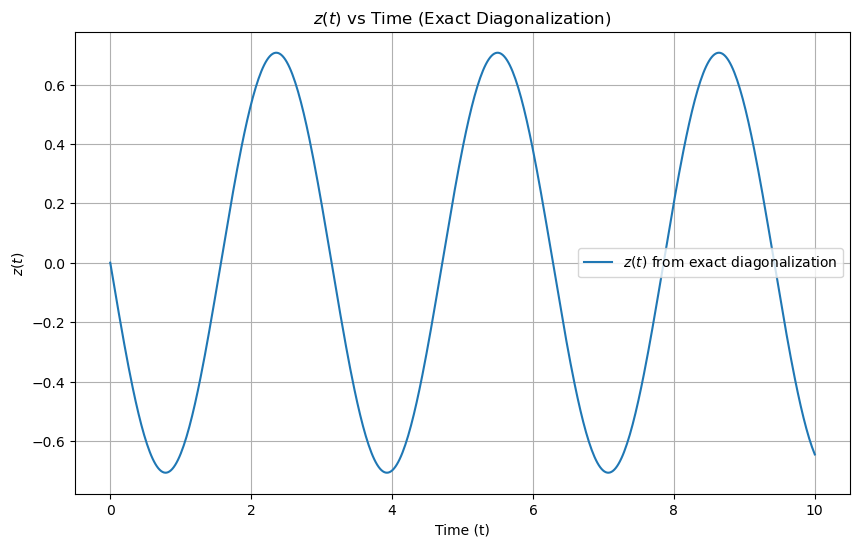

In [36]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Parameters
N = 10  # Total number of particles
J = 1.0  # Tunneling amplitude
U = 0  # On-site interaction
t_max = 10  # Maximum time
t_steps = 500  # Number of time steps

# Basis construction for N particles
basis = [(n1, N - n1) for n1 in range(N + 1)]

# Operators in the Fock basis
dim = len(basis)
N1_op = np.zeros((dim, dim))
N2_op = np.zeros((dim, dim))
H = np.zeros((dim, dim), dtype=np.complex128)

# Construct Hamiltonian matrix
for i, (n1, n2) in enumerate(basis):
    N1_op[i, i] = n1
    N2_op[i, i] = n2

    # Tunneling terms
    if n1 < N and n2 > 0:
        j = basis.index((n1 + 1, n2 - 1))
        H[i, j] = -J * np.sqrt((n1 + 1) * n2)
        H[j, i] = np.conj(H[i, j])

    # Interaction terms
    H[i, i] = U * (n1**2 + n2**2) / 2

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state = eigenvectors[:, 0]

# Apply phase difference exp(-i * pi/4 * N1_op)
phase_operator = expm(-1j * (np.pi / 4) * N1_op)
initial_state = phase_operator @ ground_state

# Time evolution and observable tracking
times = np.linspace(0, t_max, t_steps)
z_values = []

for t in times:
    # Time evolution operator
    U_t = expm(-1j * H * t)
    evolved_state = U_t @ initial_state

    # Compute z(t)
    N_diff = N1_op - N2_op
    z_t = (evolved_state.conj().T @ N_diff @ evolved_state).real / N
    z_values.append(z_t)

# Plot z(t)
plt.figure(figsize=(10, 6))
plt.plot(times, z_values, label=r"$z(t)$ from exact diagonalization")
plt.xlabel("Time (t)")
plt.ylabel(r"$z(t)$")
plt.title(r"$z(t)$ vs Time (Exact Diagonalization)")
plt.legend()
plt.grid(True)
plt.show()

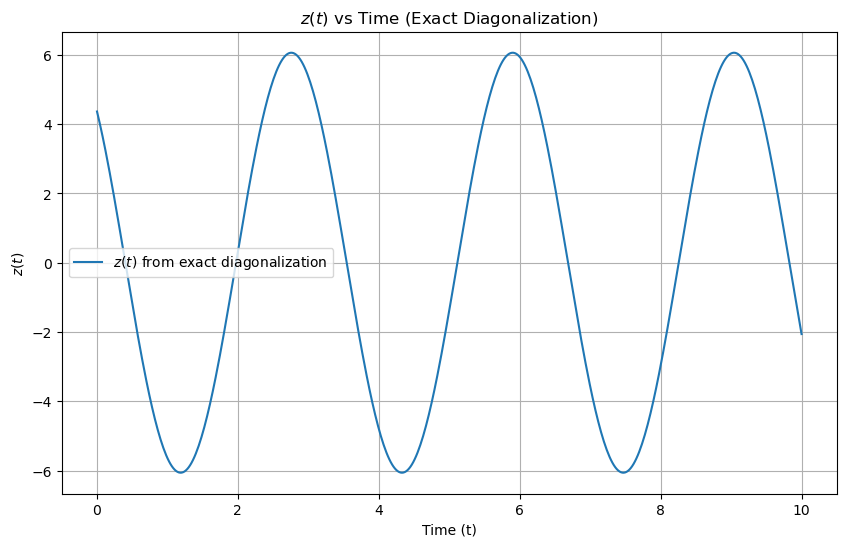

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Factorial function for matrix exponential
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

# Matrix exponential for exp(i * theta * n)
def matrix_exponential(theta, dim, terms=100):
    """
    Compute the matrix exponential exp(i * theta * n) for bosonic number operator.

    Args:
        theta (float): Phase angle.
        dim (int): Dimension of the bosonic Hilbert space.
        terms (int): Number of terms to include in the series expansion (default 50).

    Returns:
        np.ndarray: The exponential matrix.
    """
    # Construct the number operator n
    n_op = np.diag(np.arange(dim))
    
    # Scale and Squaring Parameters
    norm = np.max(np.abs(n_op)) * abs(theta)
    scale_factor = max(0, int(np.log2(norm))) if norm > 1 else 0
    scaled_theta = theta / (2**scale_factor)
    
    # Initialize the scaled exponential matrix as identity
    exp_matrix = np.eye(dim, dtype=complex)
    
    # Compute the matrix exponential of the scaled argument
    current_term = np.eye(dim, dtype=complex)
    for k in range(1, terms):
        coeff = (1j * scaled_theta) ** k / factorial(k)
        current_term = coeff * np.dot(current_term, n_op) if k > 1 else coeff * n_op
        exp_matrix += current_term
    
    # Undo scaling by squaring
    for _ in range(scale_factor):
        exp_matrix = np.dot(exp_matrix, exp_matrix)
    
    return exp_matrix

# Parameters
N = 10  # Total number of particles
J = 1.0  # Tunneling amplitude
U = 0  # On-site interaction
t_max = 10  # Maximum time
t_steps = 500  # Number of time steps

# Basis construction for N particles
basis = [(n1, N - n1) for n1 in range(N + 1)]

# Operators in the Fock basis
dim = len(basis)
N1_op = np.zeros((dim, dim))
N2_op = np.zeros((dim, dim))
H = np.zeros((dim, dim), dtype=np.complex128)

# Construct Hamiltonian matrix
for i, (n1, n2) in enumerate(basis):
    N1_op[i, i] = n1
    N2_op[i, i] = n2

    # Tunneling terms
    if n1 < N and n2 > 0:
        j = basis.index((n1 + 1, n2 - 1))
        H[i, j] = -J * np.sqrt((n1 + 1) * n2)
        H[j, i] = np.conj(H[i, j])

    # Interaction terms
    H[i, i] = U * (n1**2 + n2**2) / 2

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state = eigenvectors[:, 0]

# Apply phase difference exp(-i * pi/4 * N1_op) using the custom matrix_exponential
phase_operator = matrix_exponential(-np.pi / 4, dim)
initial_state = phase_operator @ ground_state

# Time evolution and observable tracking
times = np.linspace(0, t_max, t_steps)
z_values = []

for t in times:
    # Time evolution operator using exp(-i H t)
    U_t = np.diag(np.exp(-1j * eigenvalues * t))
    evolved_state = eigenvectors @ (U_t @ (eigenvectors.T.conj() @ initial_state))

    # Compute z(t)
    N_diff = N1_op - N2_op
    z_t = (evolved_state.conj().T @ N_diff @ evolved_state).real / N
    z_values.append(z_t)

# Plot z(t)
plt.figure(figsize=(10, 6))
plt.plot(times, z_values, label=r"$z(t)$ from exact diagonalization")
plt.xlabel("Time (t)")
plt.ylabel(r"$z(t)$")
plt.title(r"$z(t)$ vs Time (Exact Diagonalization)")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
N1_op

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]])

In [39]:
n_op = np.diag(np.arange(dim))

In [41]:
np.array_equal(n_op, N1_op)

True

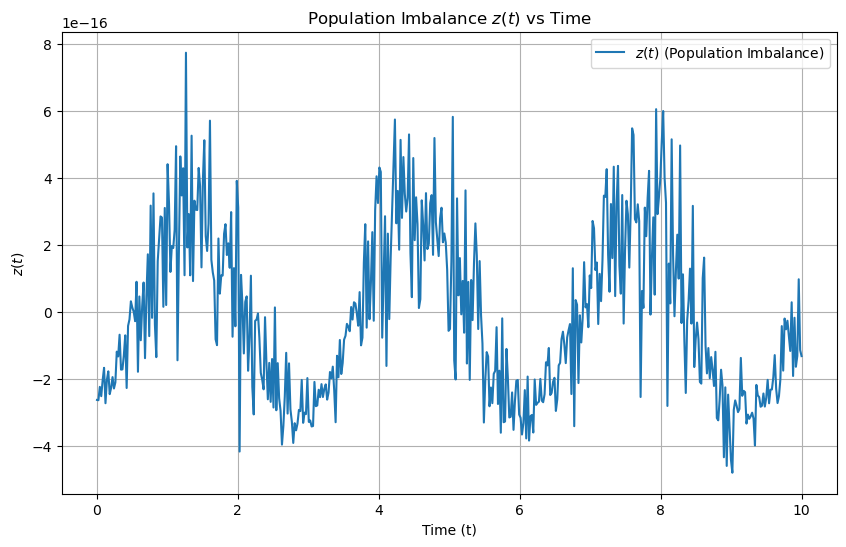

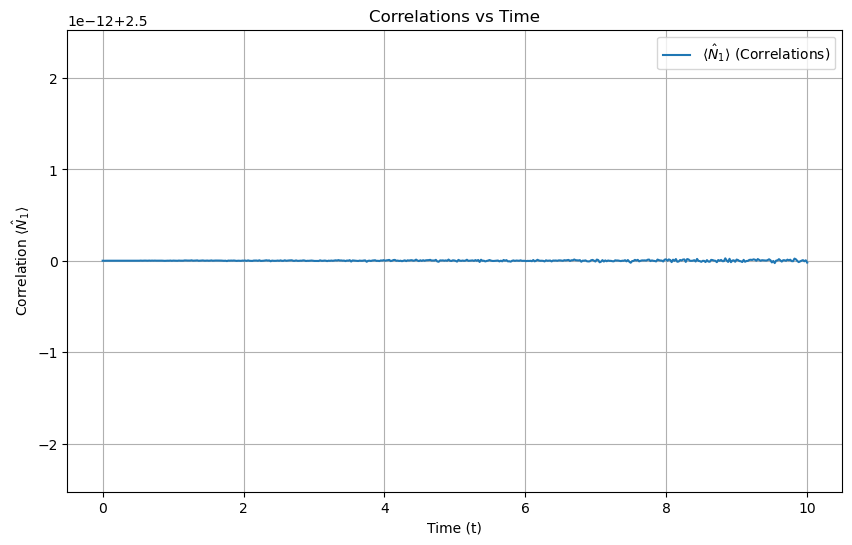

In [2]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Parameters
L = 10  # Number of lattice sites
N = 5   # Number of particles
J = 1.0  # Tunneling amplitude
U = 0.0  # Interaction strength
t_max = 10  # Maximum time
t_steps = 500  # Number of time steps

# Basis construction for Fock states
basis = [(n1, n2) for n1 in range(N + 1) for n2 in range(N + 1) if n1 + n2 == N]
dim = len(basis)

# Operators
N1_op = np.zeros((dim, dim))
N2_op = np.zeros((dim, dim))
H = np.zeros((dim, dim), dtype=np.complex128)

# Construct Hamiltonian and number operators
for i, (n1, n2) in enumerate(basis):
    N1_op[i, i] = n1
    N2_op[i, i] = n2
    
    # Tunneling terms
    if n1 < N and n2 > 0:
        j = basis.index((n1 + 1, n2 - 1))
        H[i, j] = -J * np.sqrt((n1 + 1) * n2)
        H[j, i] = np.conj(H[i, j])

    # Interaction terms
    H[i, i] = U * (n1**2 + n2**2) / 2

# Diagonalize Hamiltonian to get ground state
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state = eigenvectors[:, 0]

# Define phase operator
def construct_phase_operator(theta, N_op):
    """Constructs the phase operator exp(i * theta * N_op)."""
    return expm(1j * theta * N_op)

# Apply phase difference operator to ground state
theta = np.pi  # Phase difference
phase_operator = construct_phase_operator(theta, N1_op)
initial_state = phase_operator @ ground_state

# Time evolution
times = np.linspace(0, t_max, t_steps)
z_values = []  # Population imbalance
correlation_values = []  # Correlations

for t in times:
    # Time evolution operator
    U_t = expm(-1j * H * t)
    evolved_state = U_t @ initial_state
    
    # Compute population imbalance z(t)
    N_diff = N1_op - N2_op
    z_t = (evolved_state.conj().T @ N_diff @ evolved_state).real / N
    z_values.append(z_t)
    
    # Compute correlation between two halves
    corr_t = np.abs(evolved_state.conj().T @ N1_op @ evolved_state)
    correlation_values.append(corr_t)

# Plot population imbalance z(t)
plt.figure(figsize=(10, 6))
plt.plot(times, z_values, label=r"$z(t)$ (Population Imbalance)")
plt.xlabel("Time (t)")
plt.ylabel(r"$z(t)$")
plt.title(r"Population Imbalance $z(t)$ vs Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot correlations
plt.figure(figsize=(10, 6))
plt.plot(times, correlation_values, label=r"$\langle \hat{N}_1 \rangle$ (Correlations)")
plt.xlabel("Time (t)")
plt.ylabel(r"Correlation $\langle \hat{N}_1 \rangle$")
plt.title(r"Correlations vs Time")
plt.legend()
plt.grid(True)
plt.show()

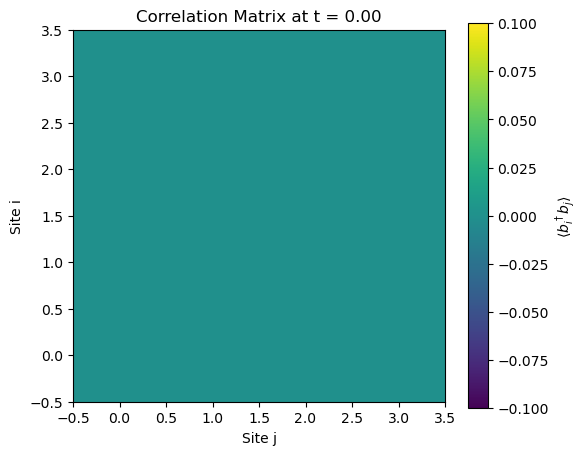

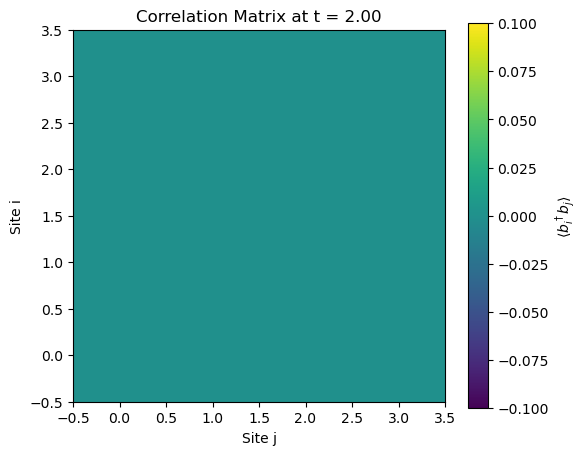

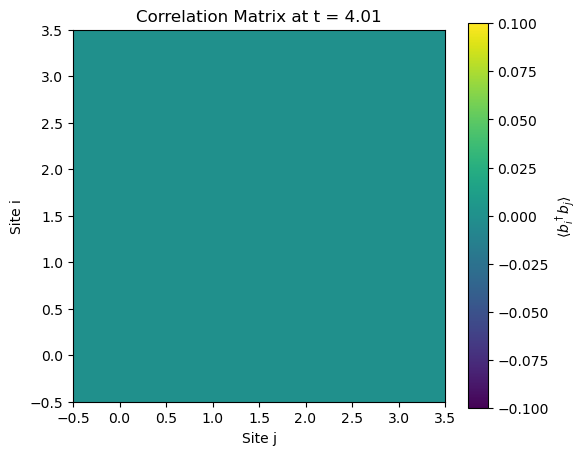

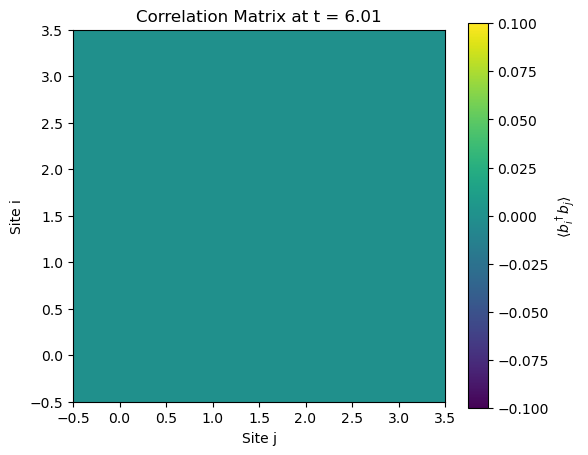

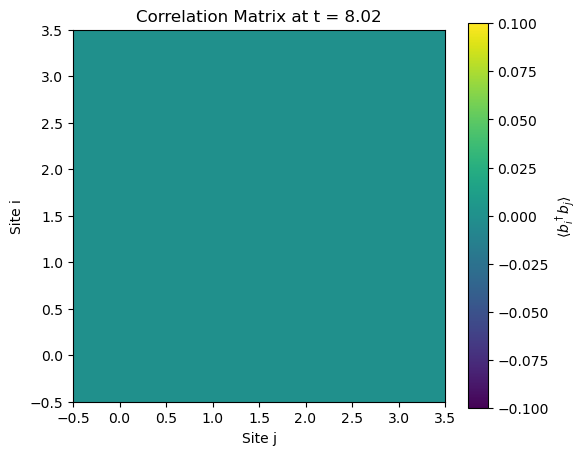

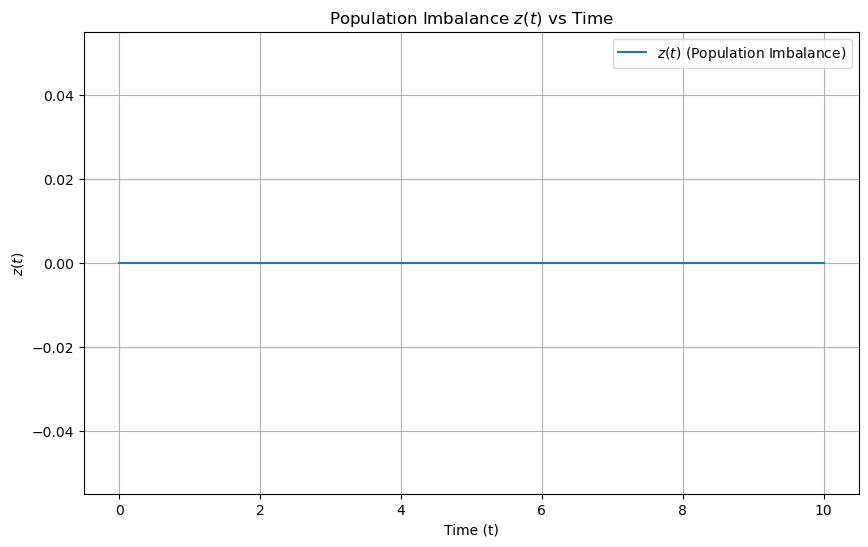

In [18]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Parameters
L = 4  # Number of lattice sites
N = 4  # Number of particles
J = 1.0  # Tunneling amplitude
U = 0.0  # On-site interaction
t_max = 10  # Maximum time
t_steps = 500  # Number of time steps

# Basis construction for Fock states with N particles on L sites
def generate_basis(L, N):
    """Generate Fock basis states for L sites and N particles."""
    from itertools import combinations_with_replacement, permutations
    from collections import Counter
    
    def multinomial(n, sites):
        """Generate all partitions of n particles across 'sites' sites."""
        if sites == 1:
            return [[n]]
        partitions = []
        for x in range(n + 1):
            for sub in multinomial(n - x, sites - 1):
                partitions.append([x] + sub)
        return partitions
    
    return [tuple(state) for state in multinomial(N, L)]

basis = generate_basis(L, N)
dim = len(basis)

# Fixing the construct_annihilation_operator function
def construct_annihilation_operator(site, basis):
    """Construct annihilation operator b_i for site."""
    op = np.zeros((dim, dim), dtype=np.complex128)
    for i, state in enumerate(basis):
        if state[site] > 0:  # Only valid if particles exist at the site
            new_state = list(state)
            new_state[site] -= 1
            try:
                j = basis.index(tuple(new_state))
                op[j, i] = np.sqrt(state[site])
            except ValueError:
                pass  # Skip invalid states
    return op

# Create annihilation operators for all sites
annihilation_operators = [construct_annihilation_operator(i, basis) for i in range(L)]

# Create number operators and tunneling Hamiltonian
number_operators = [np.zeros((dim, dim)) for _ in range(L)]
H = np.zeros((dim, dim), dtype=np.complex128)

for i, state in enumerate(basis):
    for site in range(L):
        number_operators[site][i, i] = state[site]
    
    # Tunneling terms
    for site in range(L - 1):  # Nearest-neighbor hopping
        if state[site] > 0 and state[site + 1] < N:
            new_state = list(state)
            new_state[site] -= 1
            new_state[site + 1] += 1
            try:
                j = basis.index(tuple(new_state))
                H[i, j] = -J * np.sqrt(state[site] * (state[site + 1] + 1))
                H[j, i] = np.conj(H[i, j])
            except ValueError:
                pass

    # Interaction terms (optional, U = 0 here)
    H[i, i] += U * sum(n**2 for n in state) / 2
    
# Diagonalize Hamiltonian to find ground state
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state = eigenvectors[:, 0]

# Define phase operator for the first half of the lattice
def construct_phase_operator(L, basis, theta):
    """Construct the phase operator exp(i * theta * N_half)."""
    phase_operator = np.eye(len(basis), dtype=np.complex128)
    for i, state in enumerate(basis):
        n_half = sum(state[:L // 2])  # Sum of particles in the first half
        phase_operator[i, i] = np.exp(1j * theta * n_half)
    return phase_operator

# Apply phase operator to ground state
theta = np.pi
phase_operator = construct_phase_operator(L, basis, theta)
initial_state = phase_operator @ ground_state

# Time evolution and observables
times = np.linspace(0, t_max, t_steps)
correlation_matrices = []

for t in times:
    # Time-evolved state
    U_t = expm(-1j * H * t)
    evolved_state = U_t @ initial_state

    # Correlation matrix
    correlation_matrix = np.zeros((L, L), dtype=np.complex128)

    for i in range(L):
        for j in range(L):
            # Apply b_j
            intermediate_state = annihilation_operators[j] @ evolved_state
            # Apply b_i^\dagger
            correlation_value = evolved_state.conj().T @ annihilation_operators[i].conj().T @ intermediate_state
            correlation_matrix[i, j] = correlation_value

    correlation_matrices.append(correlation_matrix)

# Plot the correlation matrix at different times
for idx, t in enumerate(times[::len(times)//5]):  # Plot a few snapshots
    plt.figure(figsize=(6, 5))
    plt.imshow(correlation_matrices[idx].real, cmap='viridis', origin='lower')
    plt.colorbar(label=r"$\langle b_i^\dagger b_j \rangle$")
    plt.title(f"Correlation Matrix at t = {t:.2f}")
    plt.xlabel("Site j")
    plt.ylabel("Site i")
    plt.show()

# Plot population imbalance z(t)
plt.figure(figsize=(10, 6))
z_values = [np.real(corr[0, 0] - corr[-1, -1]) for corr in correlation_values]  # Example z(t)
plt.plot(times, z_values, label=r"$z(t)$ (Population Imbalance)")
plt.xlabel("Time (t)")
plt.ylabel(r"$z(t)$")
plt.title(r"Population Imbalance $z(t)$ vs Time")
plt.legend()
plt.grid(True)
plt.show()

# # Plot correlations
# plt.figure(figsize=(10, 6))
# plt.imshow(np.abs(correlation_values[-1]), cmap="viridis", aspect="auto")
# plt.colorbar(label=r"$| \langle b_i^\dagger b_j \rangle |$")
# plt.title(r"Correlation Matrix $| \langle b_i^\dagger b_j \rangle |$ at $t = t_{\text{max}}$")
# plt.xlabel("Site $i$")
# plt.ylabel("Site $j$")
# plt.show()

In [12]:
correlation_values[-1]

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

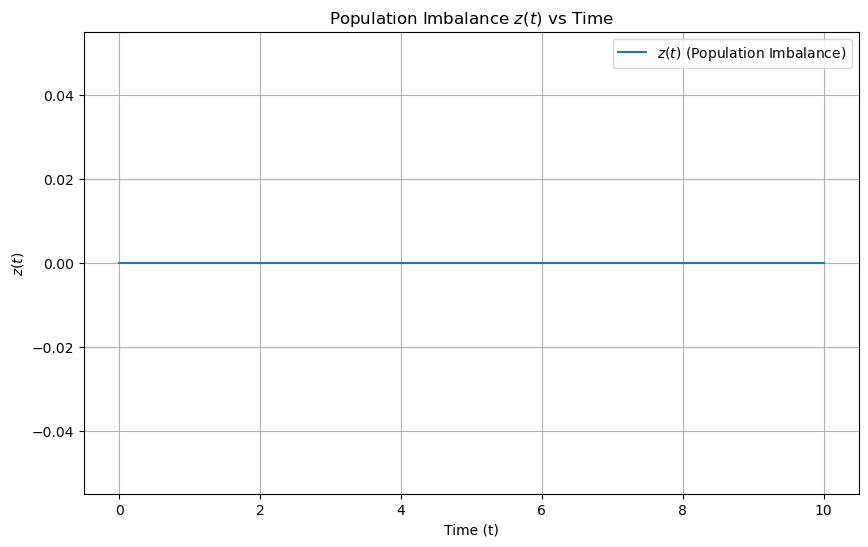

In [16]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Parameters
L = 4  # Number of lattice sites
N = 4  # Number of particles
J = 1.0  # Tunneling amplitude
U = 0.0  # On-site interaction
t_max = 10  # Maximum time
t_steps = 500  # Number of time steps

# Basis construction for Fock states with N particles on L sites
def generate_basis(L, N):
    """Generate Fock basis states for L sites and N particles."""
    from itertools import combinations_with_replacement, permutations
    from collections import Counter
    
    def multinomial(n, sites):
        """Generate all partitions of n particles across 'sites' sites."""
        if sites == 1:
            return [[n]]
        partitions = []
        for x in range(n + 1):
            for sub in multinomial(n - x, sites - 1):
                partitions.append([x] + sub)
        return partitions
    
    return [tuple(state) for state in multinomial(N, L)]

basis = generate_basis(L, N)
dim = len(basis)

# Fixing the construct_annihilation_operator function
def construct_annihilation_operator(site, basis):
    """Construct annihilation operator b_i for site."""
    op = np.zeros((dim, dim), dtype=np.complex128)
    for i, state in enumerate(basis):
        if state[site] > 0:  # Only valid if particles exist at the site
            new_state = list(state)
            new_state[site] -= 1
            try:
                j = basis.index(tuple(new_state))
                op[j, i] = np.sqrt(state[site])
            except ValueError:
                pass  # Skip invalid states
    return op

# Create annihilation operators for all sites
annihilation_operators = [construct_annihilation_operator(i, basis) for i in range(L)]

# Create number operators and tunneling Hamiltonian
number_operators = [np.zeros((dim, dim)) for _ in range(L)]
H = np.zeros((dim, dim), dtype=np.complex128)

for i, state in enumerate(basis):
    for site in range(L):
        number_operators[site][i, i] = state[site]
    
    # Tunneling terms
    for site in range(L - 1):  # Nearest-neighbor hopping
        if state[site] > 0 and state[site + 1] < N:
            new_state = list(state)
            new_state[site] -= 1
            new_state[site + 1] += 1
            try:
                j = basis.index(tuple(new_state))
                H[i, j] = -J * np.sqrt(state[site] * (state[site + 1] + 1))
                H[j, i] = np.conj(H[i, j])
            except ValueError:
                pass

    # Interaction terms (optional, U = 0 here)
    H[i, i] += U * sum(n**2 for n in state) / 2
    
# Diagonalize Hamiltonian to find ground state
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state = eigenvectors[:, 0]

# Define phase operator for the first half of the lattice
def construct_phase_operator(L, basis, theta):
    """Construct the phase operator exp(i * theta * N_half)."""
    phase_operator = np.eye(len(basis), dtype=np.complex128)
    for i, state in enumerate(basis):
        n_half = sum(state[:L // 2])  # Sum of particles in the first half
        phase_operator[i, i] = np.exp(1j * theta * n_half)
    return phase_operator

# Apply phase operator to ground state
theta = np.pi
phase_operator = construct_phase_operator(L, basis, theta)
initial_state = phase_operator @ ground_state

# Time evolution and observables
times = np.linspace(0, t_max, t_steps)
correlation_values = []

for t in times:
    # Time evolution operator
    U_t = expm(-1j * H * t)
    evolved_state = U_t @ initial_state

    # Compute correlations <b_i^dagger b_j>
    corr_t = np.zeros((L, L), dtype=np.complex128)
    for i in range(L):
        for j in range(L):
            corr_t[i, j] = evolved_state.conj().T @ (annihilation_operators[i].T @ annihilation_operators[j]) @ evolved_state

    correlation_values.append(corr_t)

# Plot population imbalance z(t)
plt.figure(figsize=(10, 6))
z_values = [np.real(corr[0, 0] - corr[-1, -1]) for corr in correlation_values]  # Example z(t)
plt.plot(times, z_values, label=r"$z(t)$ (Population Imbalance)")
plt.xlabel("Time (t)")
plt.ylabel(r"$z(t)$")
plt.title(r"Population Imbalance $z(t)$ vs Time")
plt.legend()
plt.grid(True)
plt.show()

# # Plot correlations
# plt.figure(figsize=(10, 6))
# plt.imshow(np.abs(correlation_values[-1]), cmap="viridis", aspect="auto")
# plt.colorbar(label=r"$| \langle b_i^\dagger b_j \rangle |$")
# plt.title(r"Correlation Matrix $| \langle b_i^\dagger b_j \rangle |$ at $t = t_{\text{max}}$")
# plt.xlabel("Site $i$")
# plt.ylabel("Site $j$")
# plt.show()